In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import torch.nn.functional as F

In [ ]:
#https://github.com/frodoCombs/SVM_tutorials/blob/master/SVM_lls.ipynb
##https://fordcombs.medium.com/svm-from-scratch-step-by-step-in-python-f1e2d5b9c5be
#http://www.eric-kim.net/eric-kim-net/posts/1/kernel_trick_blog_ekim_12_20_2017.pdf

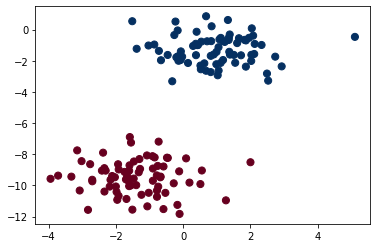

In [2]:
from sklearn.datasets import make_blobs
X, Y = make_blobs(150, 2, centers=2, random_state=2, cluster_std=1.0)
plt.scatter(X[:, 0], X[:, 1], c=Y, s=50, cmap='RdBu')

In [3]:
m, n = X.shape
lr = 0.01
epochs = 100

In [4]:
rgen = np.random.RandomState(8)
W = rgen.normal(loc=0.0, scale=0.01, size=n)
b = np.random.uniform(0,1)

In [5]:
W

array([0.00091205, 0.01091283])

In [6]:
Y[Y==0] = -1
Y

array([ 1, -1,  1,  1, -1, -1, -1,  1,  1, -1, -1, -1,  1,  1,  1,  1,  1,
       -1,  1, -1, -1,  1, -1,  1,  1,  1,  1, -1,  1, -1,  1,  1,  1, -1,
        1, -1,  1, -1,  1, -1, -1, -1,  1, -1,  1,  1, -1, -1, -1,  1, -1,
        1, -1, -1, -1, -1, -1, -1, -1, -1,  1,  1,  1, -1,  1, -1,  1, -1,
        1,  1, -1,  1,  1,  1,  1, -1,  1, -1,  1,  1,  1,  1,  1,  1, -1,
        1,  1,  1,  1, -1, -1,  1,  1,  1, -1, -1, -1,  1,  1, -1, -1, -1,
        1,  1, -1,  1, -1, -1, -1,  1, -1,  1, -1, -1, -1, -1, -1, -1, -1,
        1, -1, -1, -1,  1, -1, -1, -1,  1,  1, -1, -1,  1,  1,  1, -1,  1,
        1,  1, -1,  1, -1,  1, -1, -1, -1, -1,  1, -1,  1,  1])

In [7]:
def predict(x):
#     print(x.dot(W)+b)
    return np.where((x.dot(W)+b)>=0, 1, -1)

In [30]:
def functional_margin(y, x):
    net_output = x.T.dot(W) + b
    return net_output*y

In [9]:
def geometrical_margin(y,x):
    return function_margin(y,x)/vec_magnitude

In [10]:
def vec_magnitude():
    total = 0
    for w in W:
        total += w**2
    return np.sqrt(total)

In [32]:
for idx in range(epochs):
    func_margins = []
    for x,y in zip(X,Y):
        pred = predict(x)
        loss = y-pred
#         print(pred)
#         print(y)
#         print(loss)
#         print('-----------')
        W -= lr*loss*x
        b -= lr*loss #good?
        func_margins.append(functional_margin(y,x))
        #how to train this model actually?
    print(f'In epoch: {idx+1} min value of functional margin is: {min(func_margins)}')

In epoch: 1 min value of funcitonal margin is: -34696.38328305005
In epoch: 2 min value of funcitonal margin is: -34869.055156019924
In epoch: 3 min value of funcitonal margin is: -35041.7270289898
In epoch: 4 min value of funcitonal margin is: -35214.39890195967
In epoch: 5 min value of funcitonal margin is: -35387.07077492954
In epoch: 6 min value of funcitonal margin is: -35559.74264789942
In epoch: 7 min value of funcitonal margin is: -35732.41452086929
In epoch: 8 min value of funcitonal margin is: -35905.08639383916
In epoch: 9 min value of funcitonal margin is: -36077.75826680903
In epoch: 10 min value of funcitonal margin is: -36250.43013977892
In epoch: 11 min value of funcitonal margin is: -36423.10201274879
In epoch: 12 min value of funcitonal margin is: -36595.77388571865
In epoch: 13 min value of funcitonal margin is: -36768.445758688526
In epoch: 14 min value of funcitonal margin is: -36941.1176316584
In epoch: 15 min value of funcitonal margin is: -37113.78950462828
In e

In [ ]:
#how we can count this erros if we  only got h_hat and not g and h_star